In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy import fft

In [2]:
e=1 # electron charge is 1 amu (atomic mass unit)
m=1 # electron mass is 1 amu
hcross=1 # reduced Planck's constant is 1 amu
r0=1  # r0 is Bohr radius which is 1 amu.
c=137 # speed of light is c=137 amu
pi = 3.14159


Above, we use atomic units to represent various quantities; 
In atomic units, mass of electron me=1, reduced Planks constant hcross = 1, electron charge e=1, and Bohr radius r0 = 1. In these units, speed of light c = 137.

In [3]:
dt = 0.001 # time step in amu
N = 10**5 #increase iterative 100, 1
b = 100 # impact parameter b is expressed in units of Bohr radius. Thus b = 100 amu = 100*r0 = 5.29*10^(-7) cm.

In above, we use N as number of time steps. dt is expressed in amu. Thus dt = 1 amu is equivalent to dt = r0/c seconds = 1.763*10^(-19) seconds. Here we use dt = 0.01 amu. 

In [4]:
def force(x,y):
  Z = 1
  return  -Z/(x**2+y**2)   

In above, we have expressed Coulomb force in amu.  Hence, Coulomb force is F=-1/r^2  , where r is expressed in terms of Bohr radius.So x and y above is expressed in terms of Bohr radius 

In [5]:
x0 = -b
y0 = b
v0x = 0.05
v0y=0

Initial values of x and y are set above. Initial y=y0 is just the impact parameter b. Initial, v0x is expressed in amu. Thus, v0x = 1 amu =3 * 10^10/137 cm/s = 2.2 * 10^8 cm/s. So here, v0x = 0.05 amu =  1.1 * 10^7 cm/s

In [6]:
tolerance = 0.1

In [9]:
t = np.zeros(N)
x = np.zeros(N)
y = np.zeros(N)
vx = np.zeros(N)
vy = np.zeros(N)
ax = np.zeros(N)
ay = np.zeros(N)
P = np.zeros(N)
x[0] = x0
y[0] = y0
vx[0] = v0x
vy[0] = v0y
t[0] = 0

for i in range(N):
  ax[i] = (force(x[i], y[i]) / m )*x[i]/(x[i]**2+y[i]**2)**(1/2) 
  ay[i] = (force(x[i], y[i]) / m )*y[i]/(x[i]**2+y[i]**2)**(1/2) 
  P[i] = (2/(3*c**3))*(ax[i]**2+ay[i]**2)    # Power as function of time(Larmor's formula in a.m.u)
  if i == N - 1:
    break
  t[i+1] = t[i] + dt 
  vx[i + 1] = vx[i] + ax[i] * dt
  vy[i + 1] = vy[i] + ay[i] * dt
  x[i + 1] = x[i] + vx[i] * dt + (1.0/2.0) * ax[i] * dt ** 2.0
  y[i + 1] = y[i] + vy[i] * dt + (1.0/2.0) * ay[i] * dt ** 2.0
  
  vx_frac_error = (abs(vx[i+1])-abs(vx[i]))/abs(vx[i])
  #vy_frac_error = (abs(vy[i+1])-abs(vy[i]))/abs(vy[i])

  x_frac_error = (abs(x[i+1])-abs(x[i]))/abs(x[i])
  y_frac_error = (abs(y[i+1])-abs(y[i]))/abs(y[i])

  max_frac_error = max(vx_frac_error,x_frac_error,y_frac_error)
  if max_frac_error > tolerance:
    print(max_frac_error,tolerance)



Text(0.5, 1.0, '2D x-y path of electron')

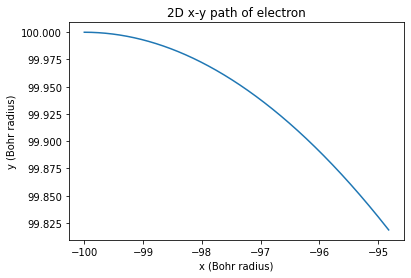

In [10]:
plt.plot(x, y)
plt.xlabel('x (Bohr radius)')
plt.ylabel('y (Bohr radius)')
plt.title('2D x-y path of electron')

Text(0.5, 1.0, 'x-component of electron velocity as function of time t')

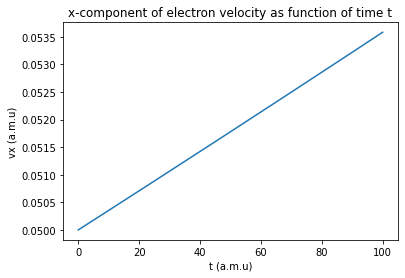

In [11]:
plt.plot(t,vx)
plt.xlabel('t (a.m.u)')
plt.ylabel('vx (a.m.u)')
plt.title('x-component of electron velocity as function of time t')

Text(0.5, 1.0, 'y-component of electron velocity as function of time t')

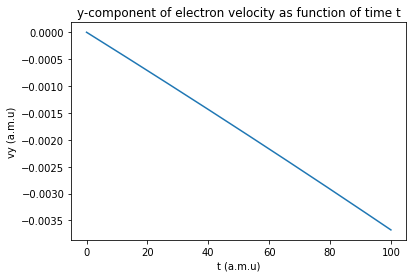

In [12]:
plt.plot(t,vy)
plt.xlabel('t (a.m.u)')
plt.ylabel('vy (a.m.u)')
plt.title('y-component of electron velocity as function of time t')

Text(0.5, 1.0, '           x-component of electron acceleration with time')

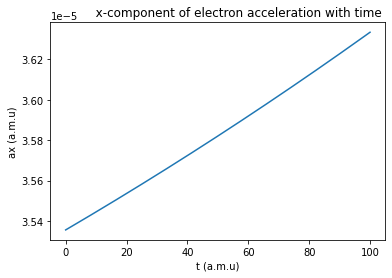

In [13]:
plt.plot(t,ax)
plt.xlabel('t (a.m.u)')
plt.ylabel('ax (a.m.u)')
plt.title('           x-component of electron acceleration with time')

Text(0.5, 1.0, '          y-component of electron acceleration with time t')

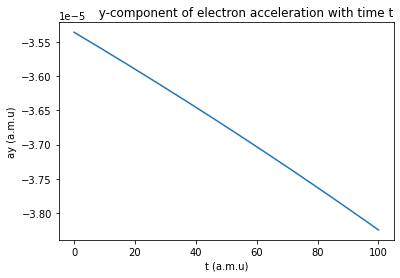

In [14]:
plt.plot(t,ay)
plt.xlabel('t (a.m.u)')
plt.ylabel('ay (a.m.u)')
plt.title('          y-component of electron acceleration with time t')

Text(0.5, 1.0, '          Radiated power P(t) with time t')

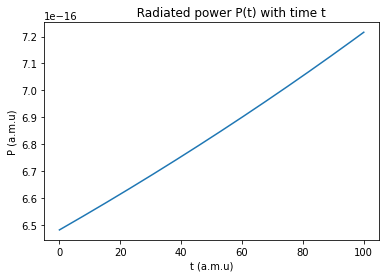

In [15]:
plt.plot(t,P)
plt.xlabel('t (a.m.u)')
plt.ylabel('P (a.m.u)')
plt.title('          Radiated power P(t) with time t')

In [16]:
FT_ax = fft.fft(ax)
FT_ay = fft.fft(ay)

amplitude_ax = (2 / N) * np.abs(FT_ax)
amplitude_ay = (2 / N) * np.abs(FT_ay)

Power_FT = (8*pi/(3*c**3))*(amplitude_ax**2 + amplitude_ay**2)  # Here, radiated power Power_FT is in terms of Fourier transformed acceleration

freq = fft.fftfreq(N, dt)

In the above, we use scipy Fourier transform library and get Fourier transform of x and y components of acceleration labelled as amplitude_ax and amplitude_ay. The radiated Fourier power is then proportional to sum of squares of  Fourier-transformed acceleration(Fourier domain Larmor's identity)

Text(0.5, 1.0, ' Radiated power spectrum')

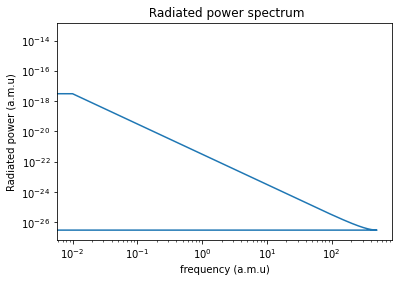

In [17]:
plt.plot(freq, Power_FT)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('frequency (a.m.u)')
plt.ylabel('Radiated power (a.m.u)')
plt.title(' Radiated power spectrum')
#plt.plot(freq, analytic_power)
#plt.axvline(, color = 'r')

In the above plot, the power spectrum computed through Fourier transform of acceleration, is plotted as a function of frequency. The conversion for frequency in a.m.u to Hz is 1 a.m.u = 5.67 * 10^(18) Hz.

In [18]:
#analytic_power = np.zeros(N)
#for i in range(N):
#  ee = (math.exp(-freq[i]*b/v0x))
#  analytic_power[i] = 8/(3*pi*(c**3)*(v0x*b)**2)*ee

In the above, we try to plot the analytic expression for radiated power as function of frequency.